# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps Before Submitting

You may need to install packages as follows:

`python -m pip install matplotlib numpy scipy pandas scikit-learn`

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [2]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and its tail length by plotting a scatter plot of the `age` and `tailL` columns. Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. 

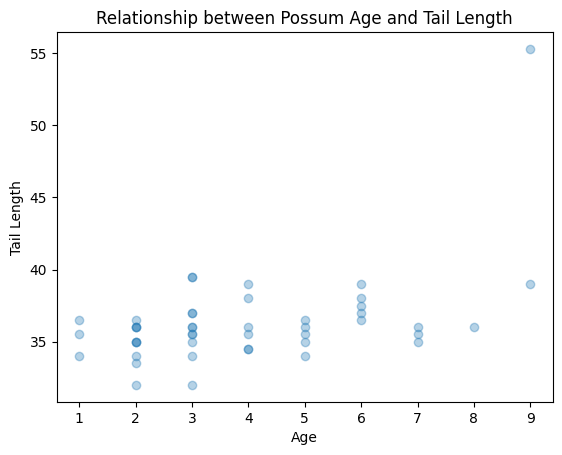

In [3]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv')

# Make the scatter plot (don't forget the axis labels)
plt.scatter(possum_data['age'],possum_data['tailL'],alpha=0.33)
plt.title("Relationship between Possum Age and Tail Length")
plt.ylabel("Tail Length")
plt.xlabel("Age")
plt.show()

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call your function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [4]:
def linearModelPredict(b,X):
    yp = X@b
    return yp

# Always important: Test the new function you have written! 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
p = linearModelPredict(b,X)
print("yHat: {}\nyHat Dimensions: {}".format(p,p.shape))

# By the way: What happens when b is a 2d-array? 
# When b is a 2D array, depending on the dimensions either X and/or b will need to be transposed in order to perform the dot product of the two matrices, since the dot product can only be performed when the number of columns in the first matrix matches the number of rows in the second matrix.


yHat: [ 0.1 -0.2  0.7]
yHat Dimensions: (3,)


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

**Written answer**: To minimize the cost do you need increase or decrease the value of the parameters? 

In [5]:
def linearModelLossRSS(b,X,y):
    yp = linearModelPredict(b,X)
    res = y-yp
    residual_sum_of_squares = np.sum(res**2)
    gradient = -2*(X.T@res.T)
    return (residual_sum_of_squares, gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
loss, gradient = linearModelLossRSS(b,X,y)
print("Loss: {}".format(loss))
print("Gradient: {}".format(gradient))

# To minimize the cost, the parameters need to be decreased.


Loss: 2.06
Gradient: [-3.6 -4. ]


### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [6]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    import scipy.optimize as so
    bstart = [0,0]
    result = so.minimize(lossfcn,bstart,args=(X,y),jac=True)
    estimated_betas=result.x

    yp=linearModelPredict(estimated_betas,X)
    rss = np.sum((y-yp)**2)
    tss = np.sum((y-y.mean())**2)
    R2 = 1-(rss/tss)
    return (estimated_betas,R2)

X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
estbetas, r2 = linearModelFit(X,y,lossfcn=linearModelLossRSS)
print("Best Parameters: {}".format(estbetas))
print("R2: {}".format(r2))

Best Parameters: [0.6 0.6]
R2: 0.75


### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally spaced ages (using for example np.linspace). Also report the R2 value for the fit. You can do this by either printing out the R2 of the fit or putting it on your plot via the `annotate` function in matplotlib.


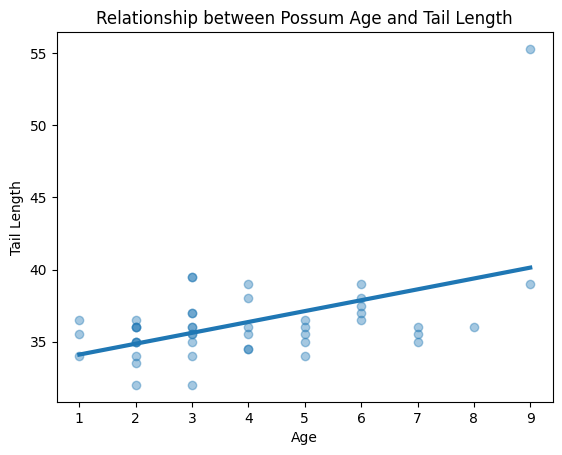

Optimized betas: [33.35046603  0.75372837]
R2: 0.22286587947604086


In [7]:
# Make the design matrix using np.c_ 
# y = ...
# X =  np.c_[...]
# Call your fitting function 
x1=possum_data['age'].to_numpy()
x2=np.reshape(x1, (-1,1))           #-1 is an unspecified value that is determined when run
X=np.concatenate((np.ones((x2.shape[0],1)), x2),1)
y=possum_data['tailL'].to_numpy()

estimatedb, R_2 = linearModelFit(X,y,lossfcn = linearModelLossRSS)


# Create a new X matrix with equally space data 
xFitLine = np.linspace(possum_data['age'].min(), possum_data['age'].max(),num=100)
xFitLine2=np.reshape(xFitLine,(-1,1))
xFitLine3=np.concatenate((np.ones((xFitLine2.shape[0],1)),xFitLine2),1)
yFitLine=linearModelPredict(estimatedb,xFitLine3)

# Create the scatterplot and add the line to the graph 
plt.scatter(x1,y,alpha=0.4)
plt.title("Relationship between Possum Age and Tail Length")
plt.xlabel("Age")
plt.ylabel("Tail Length")
plt.plot(xFitLine,yFitLine,'',linewidth=3)
plt.show()

# Report R2 
print("Optimized betas: {}".format(estimatedb))
print("R2: {}".format(R_2))


## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [8]:
def linearModelLossLAD(b,X,y):
    yp=linearModelPredict(b,X)
    res=y-yp
    sum_abs_dev=np.sum(np.absolute(res))
    grad=-1*(X.T@(np.sign(res.T)))
    return (sum_abs_dev,grad)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
sad, grad = linearModelLossLAD(b,X,y)
print("Loss: {}".format(sad))
print("Gradient: {}".format(grad))

Loss: 2.0
Gradient: [-1. -1.]


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the R2-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



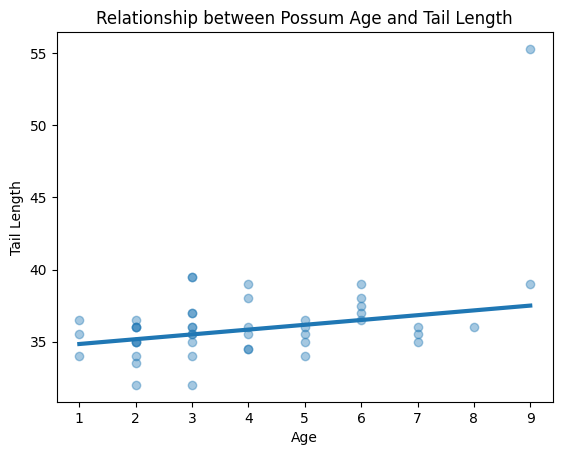

Optimized betas: [34.50470793  0.33291433]
R2: 0.1293709621120337


In [9]:
# Call your fitting function 
x1=possum_data['age'].to_numpy()    #row matrix
x2=np.reshape(x1, (-1,1))           #reshape to column matrix
X=np.concatenate((np.ones((x2.shape[0],1)), x2),1)  #add column of 1s to matrix for beta0, otherwise only get beta1
y=possum_data['tailL'].to_numpy()   #row matrix

estimatedb, R_2 = linearModelFit(X,y,lossfcn = linearModelLossLAD)

# Create a new X matrix with equally space data 
xFitLine = np.linspace(possum_data['age'].min(), possum_data['age'].max(),num=100)  #row matrix
xFitLine2=np.reshape(xFitLine,(-1,1))                                 #reshape to column matrix
xFitLine3=np.concatenate((np.ones((xFitLine2.shape[0],1)),xFitLine2),1)     #add column of ones
yFitLine=linearModelPredict(estimatedb,xFitLine3)                                   #row matrix

# Create the scatterplot and add the line to the graph 
plt.scatter(x1,y,alpha=0.4)
plt.title("Relationship between Possum Age and Tail Length")
plt.xlabel("Age")
plt.ylabel("Tail Length")
plt.plot(xFitLine,yFitLine,'',linewidth=3)
plt.show()

# Report R2 
print("Optimized betas: {}".format(estimatedb))
print("R2: {}".format(R_2))

Written answer: 
The R2 derived from LAD, 0.129, is lower than that derived from RSS, 0.223. This is likely because LAD is not as sensitive as RSS to outliers, which might improve the fit for RSS despite LAD being the more robust method.

### Question 2.3: /15 points

Fit an OLS model to the possum data with the `linear_model` module from the `sklearn` package by using the `LinearRegression` class.  In no more than two sentences, comment on the rsquared values from `sklearn` and the rsquared values from your models. Are they similar?

In [10]:
x1=possum_data['age'].to_numpy()
x2=np.reshape(x1, (-1,1))           
X=np.concatenate((np.ones((x2.shape[0],1)), x2),1)
y=possum_data['tailL'].to_numpy()
regression=linear_model.LinearRegression().fit(X,y)
r2=regression.score(X,y)

print("R2: {}".format(r2))

R2: 0.22286587947604108


The rsquared values I got from the RSS model and the OLS model are the same, 0.223. The LAD model value, 0.129, is lower than both.